# **Sale of summer clothes on e-comm**

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
url='https://raw.githubusercontent.com/nimjesm/Python4DS/master/summer-products-with-rating-and-performance_2020-08.csv'
df=pd.read_csv(url)
df.head(2)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08


In [37]:
df.shape

(1573, 43)

In [38]:
type(df)

pandas.core.frame.DataFrame

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [40]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,2789.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [41]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [49]:
df.drop('has_urgency_banner',axis=1,inplace=True)
df.drop('urgency_text',axis=1,inplace=True)
df.drop('merchant_profile_picture',axis=1,inplace=True)
df.drop('merchant_has_profile_picture',axis=1,inplace=True)
df.drop('product_url',axis=1,inplace=True)
df.drop('merchant_info_subtitle',axis=1,inplace=True)
df.drop('product_picture',axis=1,inplace=True)
df.head(3)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_rating_count,merchant_rating,merchant_id,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,17752,3.899673,56458aa03a698c35c9050988,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,5ea10e2c617580260d55310a,summer,2020-08


In [179]:
# sort data based on rating
r=df.sort_values(by='rating',ascending=False)
r.head(3)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_rating_count,merchant_rating,merchant_id,product_id,theme,crawl_month,Sales
732,2020 New Women Summer Fashion O-neck Sleevele...,2020 New Women Summer Fashion O-neck Sleevele...,8.0,7,EUR,10,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Slim Fitting,Tank,summer tank top,Tops...",grey,M,50,Livraison standard,3,0,10,50,CN,longming,longming,27175,3.966035,58a99ceca65ebc504a6ebf1e,5eccb8aa18e87d64f13e012c,summer,2020-08,70
904,New Ladies Fashion Print Top Summer V-neck Sle...,New Ladies Fashion Print Top Summer V-neck Sle...,9.0,10,EUR,10,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"blouse,Summer,Fashion,Ladies Fashion,topsandto...",black,XS,50,Livraison standard,3,0,43,50,CN,pedeska,pedeska,291,3.690722,5d676dae88a10253b1781da6,5ed48479a79b693eae66e575,summer,2020-08,100
216,Women's Sexy Push Up Bikini Sexy Vintage Set S...,Women's Sexy Push Up Bikini Vintage Set Sexy B...,11.0,30,EUR,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"woman fashion,Fashion,outside,Vintage,sexy bik...",NaN,S,50,Livraison standard,3,0,78,50,CN,YIWU SHI AO HANG DIAN ZI SHANG WU YOU XIAN GON...,yiwushiaohangdianzishangwuyouxiangongsi,22621,4.295124,56025ed8293a5b2d24779bde,573db9316b335c34ca0513b8,summer,2020-08,300


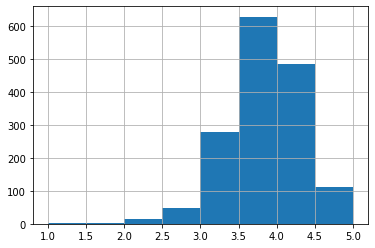

In [175]:
#plot a rating distribution
r['rating'].hist(bins=8)

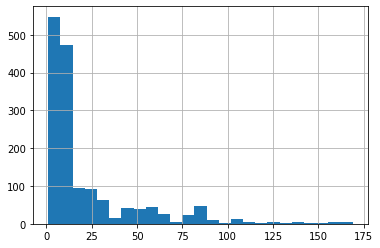

In [83]:
#what is the retail price distribution pattern of dataset
df[(df['retail_price']>0)&(df['retail_price']<250)]['retail_price'].hist(bins=25)

In [68]:
# how many unique currency_buyer we have in our dataset
df['currency_buyer'].nunique()

1

In [67]:
# how many unique sizes do we have in our dataset
df['product_variation_size_id'].nunique()

106

In [96]:
# what are the top 5 sizes in demand
df['product_variation_size_id'].value_counts().head()

S      641
XS     356
M      200
XXS    100
L       49
Name: product_variation_size_id, dtype: int64

In [80]:
#what are the shipping options available
df['shipping_option_name'].unique()	

array(['Livraison standard', 'Envio Padrão', 'Standart Gönderi',
       'Standardversand', 'Envío normal', 'Standardowa wysyłka',
       'الشحن القياسي', 'Expediere Standard', 'การส่งสินค้ามาตรฐาน',
       'Standard Shipping', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
       'Livraison Express', 'Стандартная доставка', 'Spedizione standard',
       'Ekspresowa wysyłka'], dtype=object)

In [76]:
#how many shipping options are available
df['shipping_option_name'].nunique()	

15

In [85]:
# what are the origin countries here
df['origin_country'].unique()

array(['CN', 'US', nan, 'VE', 'AT', 'SG', 'GB'], dtype=object)

In [103]:
# Obtain country-wise count of data
df.groupby('origin_country').agg('count')

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_title,merchant_name,merchant_rating_count,merchant_rating,merchant_id,product_id,theme,crawl_month
origin_country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AT,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CN,1516,1516,1516,1516,1516,1516,1516,1516,1516,1472,1472,1472,1472,1472,1516,1516,1516,1516,1516,1477,1503,1516,1516,1516,1516,1516,1516,1516,1512,1516,1516,1516,1516,1516,1516
GB,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
SG,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
US,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
VE,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [119]:
# how many unique merchants are involved
df['merchant_title'].nunique()

958

In [129]:
# country-wise top merchants based on sales
df['Sales']=df['retail_price']*df['units_sold']
df.groupby(['origin_country','merchant_title']).agg('sum').sort_values(by='Sales',ascending=False)

price  ...    Sales
origin_country merchant_title                         ...         
CN             FashionForChanny                40.00  ...  8450000
               GL                              27.00  ...  6840000
               HOT DRESS                       46.00  ...  5836600
               bushangfushi                    13.00  ...  5040000
               fashionforgirls                 50.00  ...  4809200
...                                              ...  ...      ...
               xiaoguiling                     16.00  ...       32
               caogao                          11.00  ...       30
               Guangzhou Fashion Girl co.,ltd  11.00  ...       20
               gaomeigui                       14.00  ...       14
               Kyiswen                          2.72  ...        9

[952 rows x 23 columns]

In [166]:
# how many articles are shipped to over countries
df[df['countries_shipped_to']>100].shape

(51, 37)

In [212]:
df2=df[['Sales','rating','rating_five_count','rating_four_count','rating_three_count','rating_two_count','rating_one_count','units_sold']]
df2

,Sales,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,units_sold
0,1400,3.76,26.0,8.0,10.0,1.0,9.0,100
1,440000,3.45,2269.0,1027.0,1118.0,644.0,1077.0,20000
2,4300,3.57,5.0,4.0,2.0,0.0,3.0,100
3,40000,4.03,295.0,119.0,87.0,42.0,36.0,5000
4,300,3.10,6.0,4.0,2.0,2.0,6.0,100
...,...,...,...,...,...,...,...,...
1568,90000,4.08,722.0,293.0,185.0,77.0,90.0,10000
1569,5600,3.07,11.0,3.0,1.0,3.0,10.0,100
1570,1900,3.71,24.0,15.0,8.0,3.0,9.0,100
1571,1100,2.50,0.0,1.0,0.0,0.0,1.0,100


In [215]:
# Get a correlation between sales,ratings and units sold
df2.corr()

,Sales,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,units_sold
Sales,1.000000,0.033099,0.584500,0.607209,0.600047,0.586208,0.576002,0.615779
rating,0.033099,1.000000,0.138416,0.100638,0.047221,0.004735,-0.031759,0.039478
rating_five_count,0.584500,0.138416,1.000000,0.981201,0.932647,0.873690,0.828767,0.876231
rating_four_count,0.607209,0.100638,0.981201,1.000000,0.976391,0.933168,0.891921,0.891116
rating_three_count,0.600047,0.047221,0.932647,0.976391,1.000000,0.984866,0.952137,0.894243
rating_two_count,0.586208,0.004735,0.873690,0.933168,0.984866,1.000000,0.982860,0.866685
rating_one_count,0.576002,-0.031759,0.828767,0.891921,0.952137,0.982860,1.000000,0.832816
units_sold,0.615779,0.039478,0.876231,0.891116,0.894243,0.866685,0.832816,1.000000


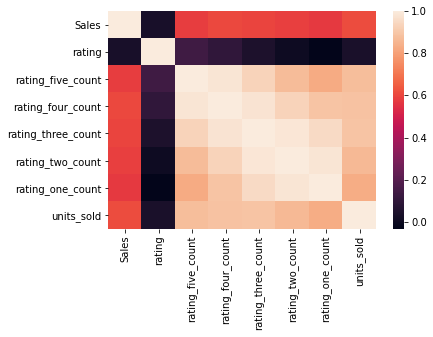

In [214]:
sns.heatmap(df2.corr())